In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']= (10,5)
plt.rcParams['figure.dpi'] = 300
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("Fraud_check.csv")

In [3]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


# EDA

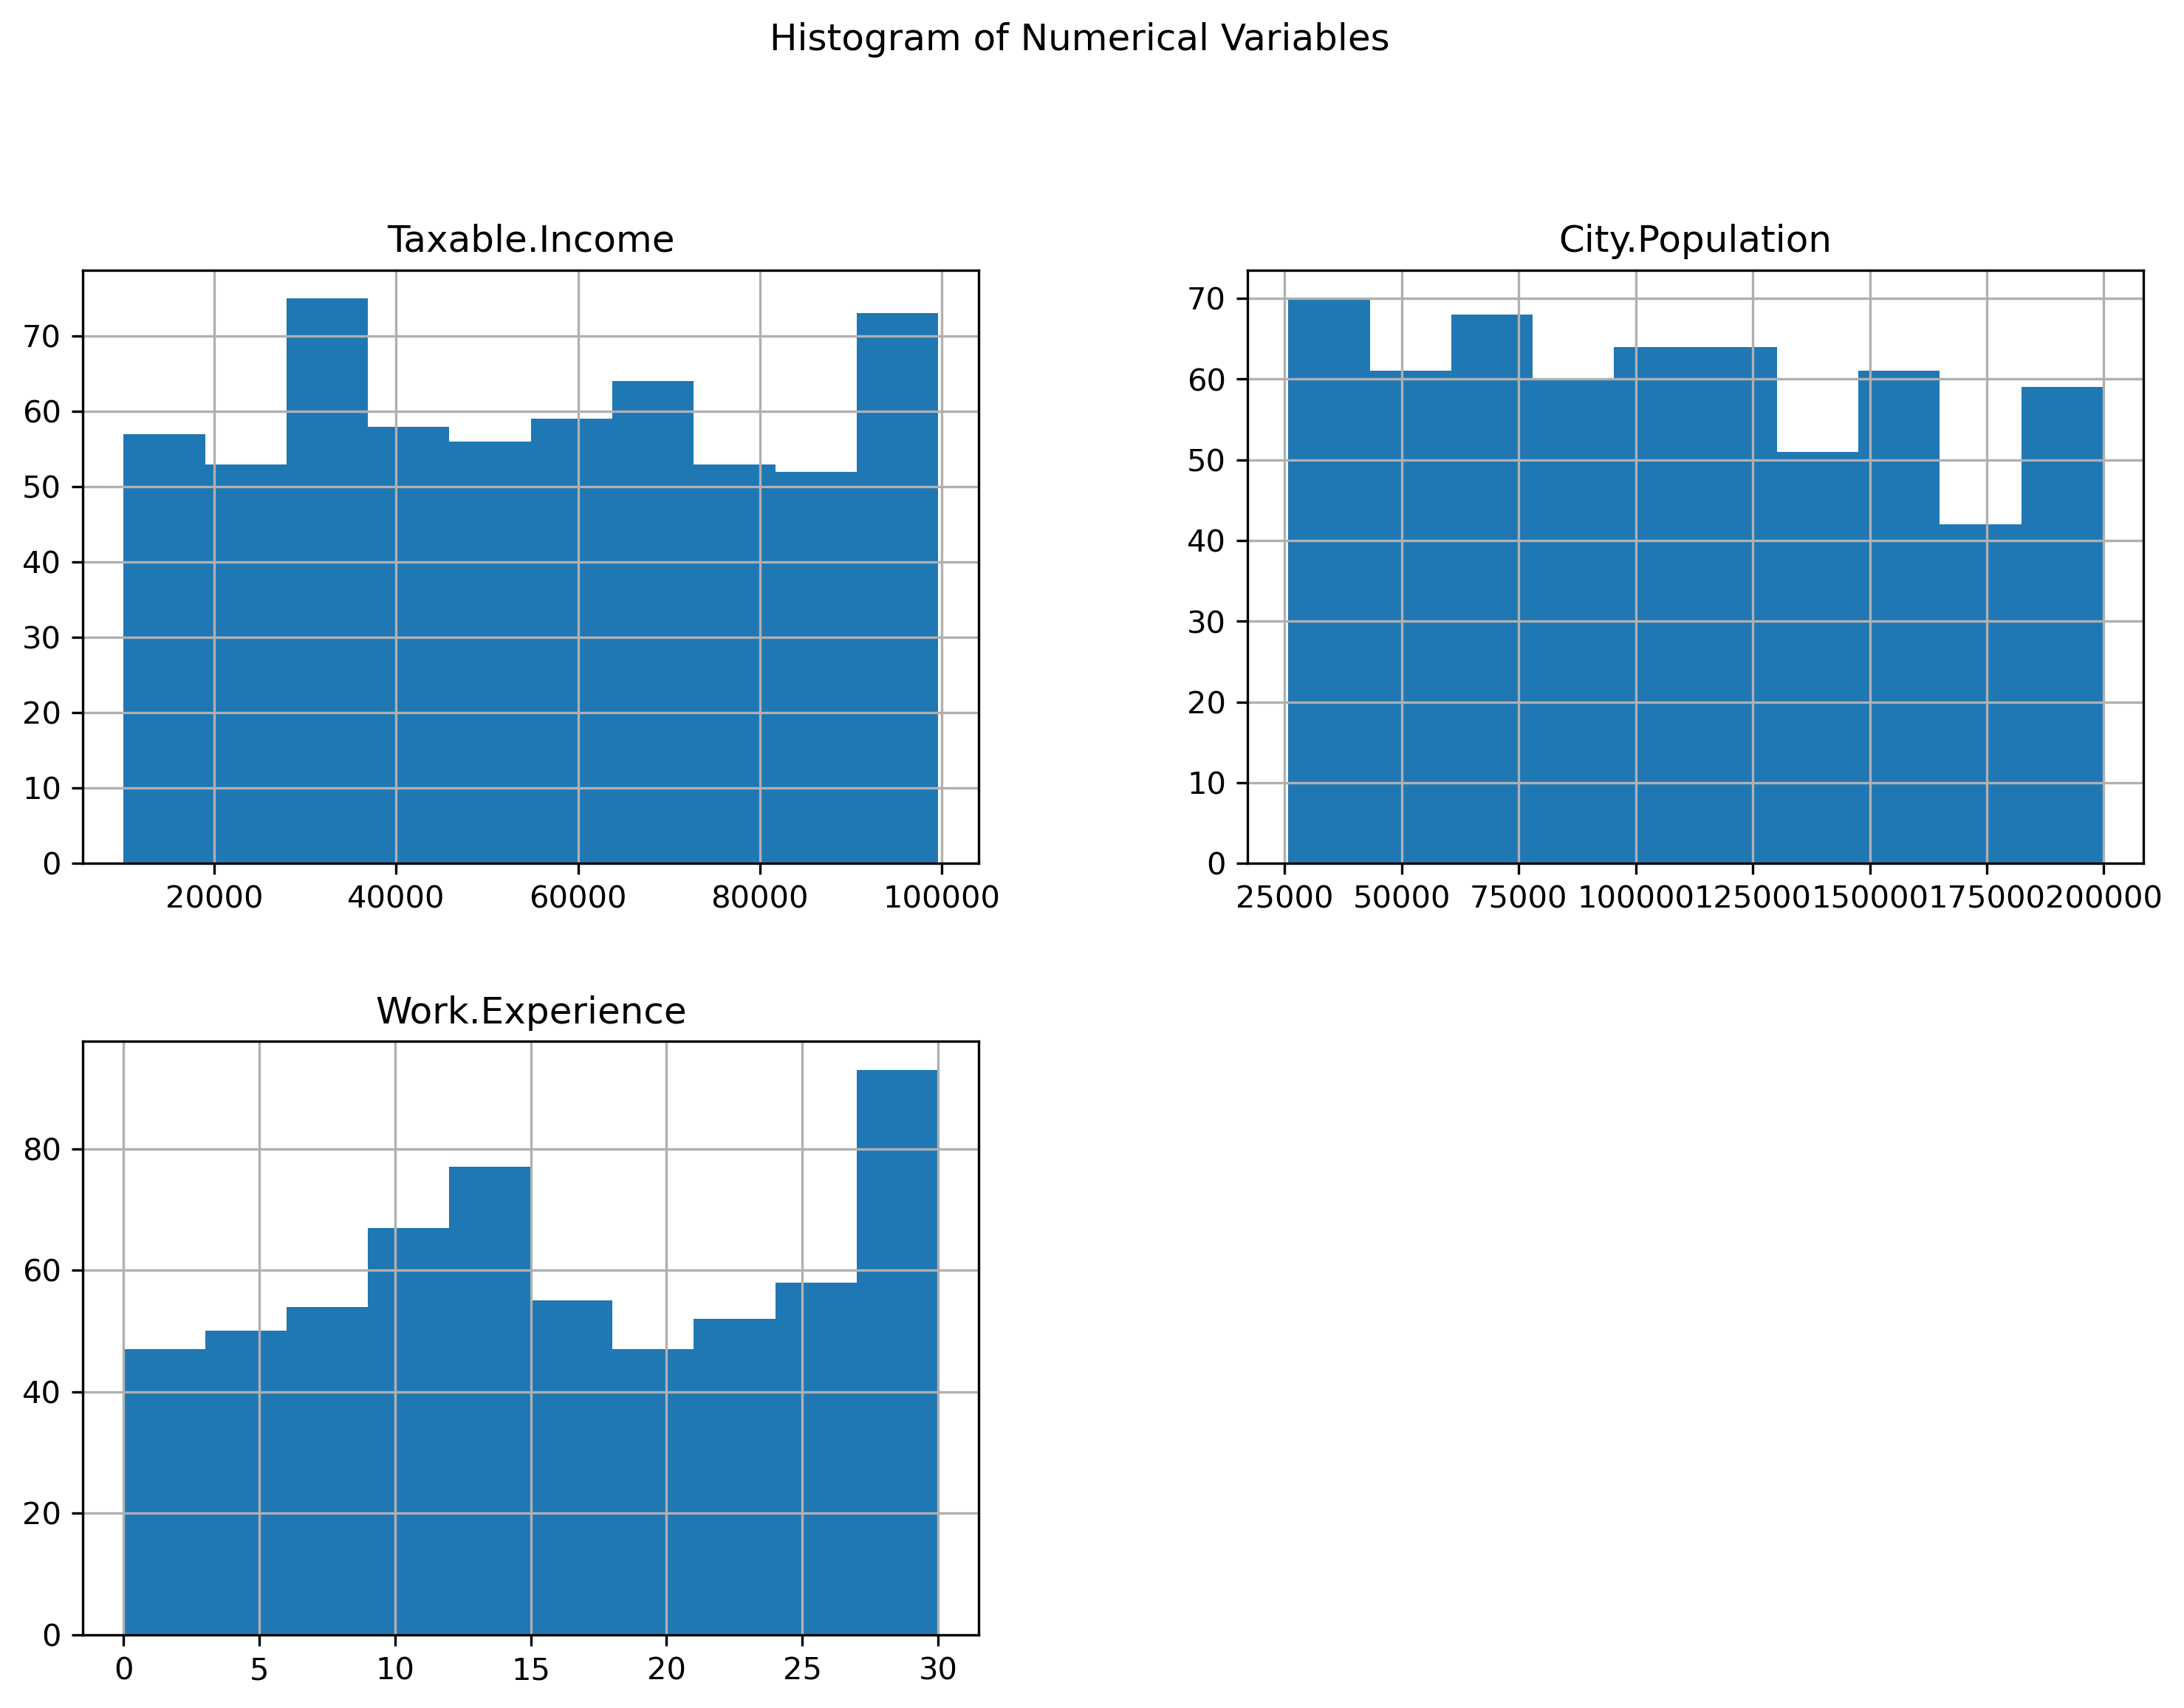

In [5]:
numerical_features = df.select_dtypes(int).columns
df[numerical_features].hist(figsize=(12, 8))
plt.suptitle('Histogram of Numerical Variables', y=1.02)
plt.show()

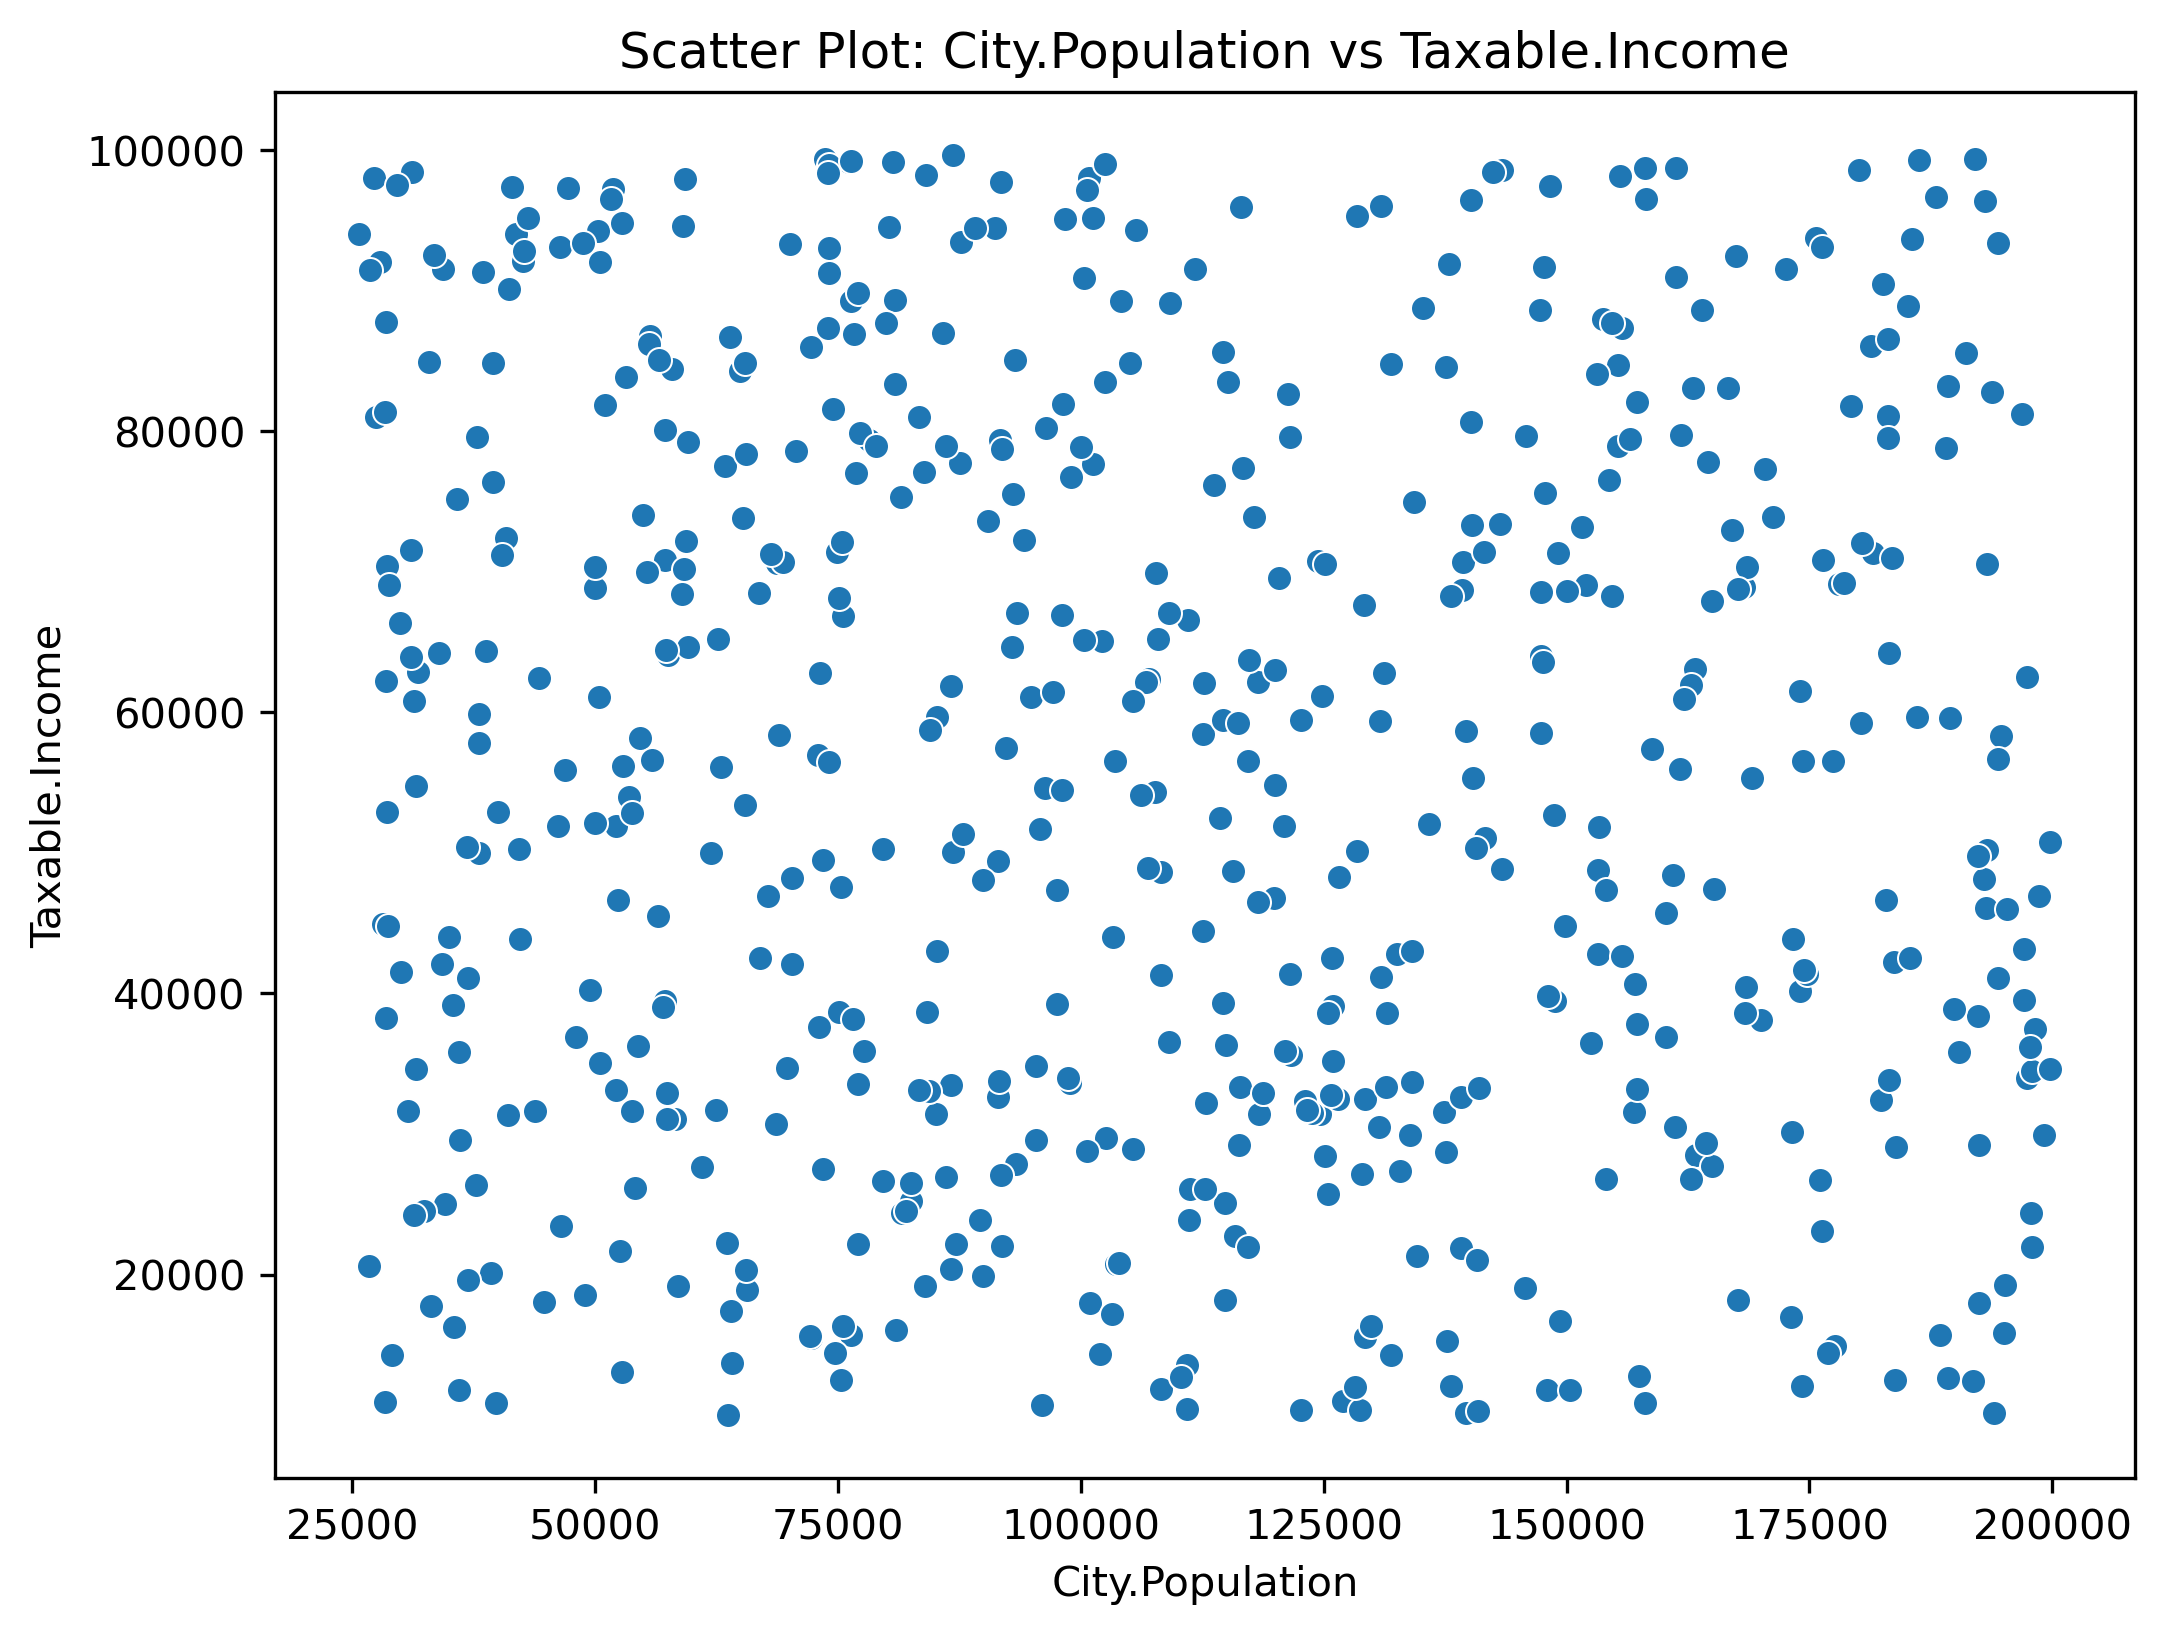

In [6]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='City.Population', y='Taxable.Income', data=df)
plt.title('Scatter Plot: City.Population vs Taxable.Income')
plt.xlabel('City.Population')
plt.ylabel('Taxable.Income')
plt.show()

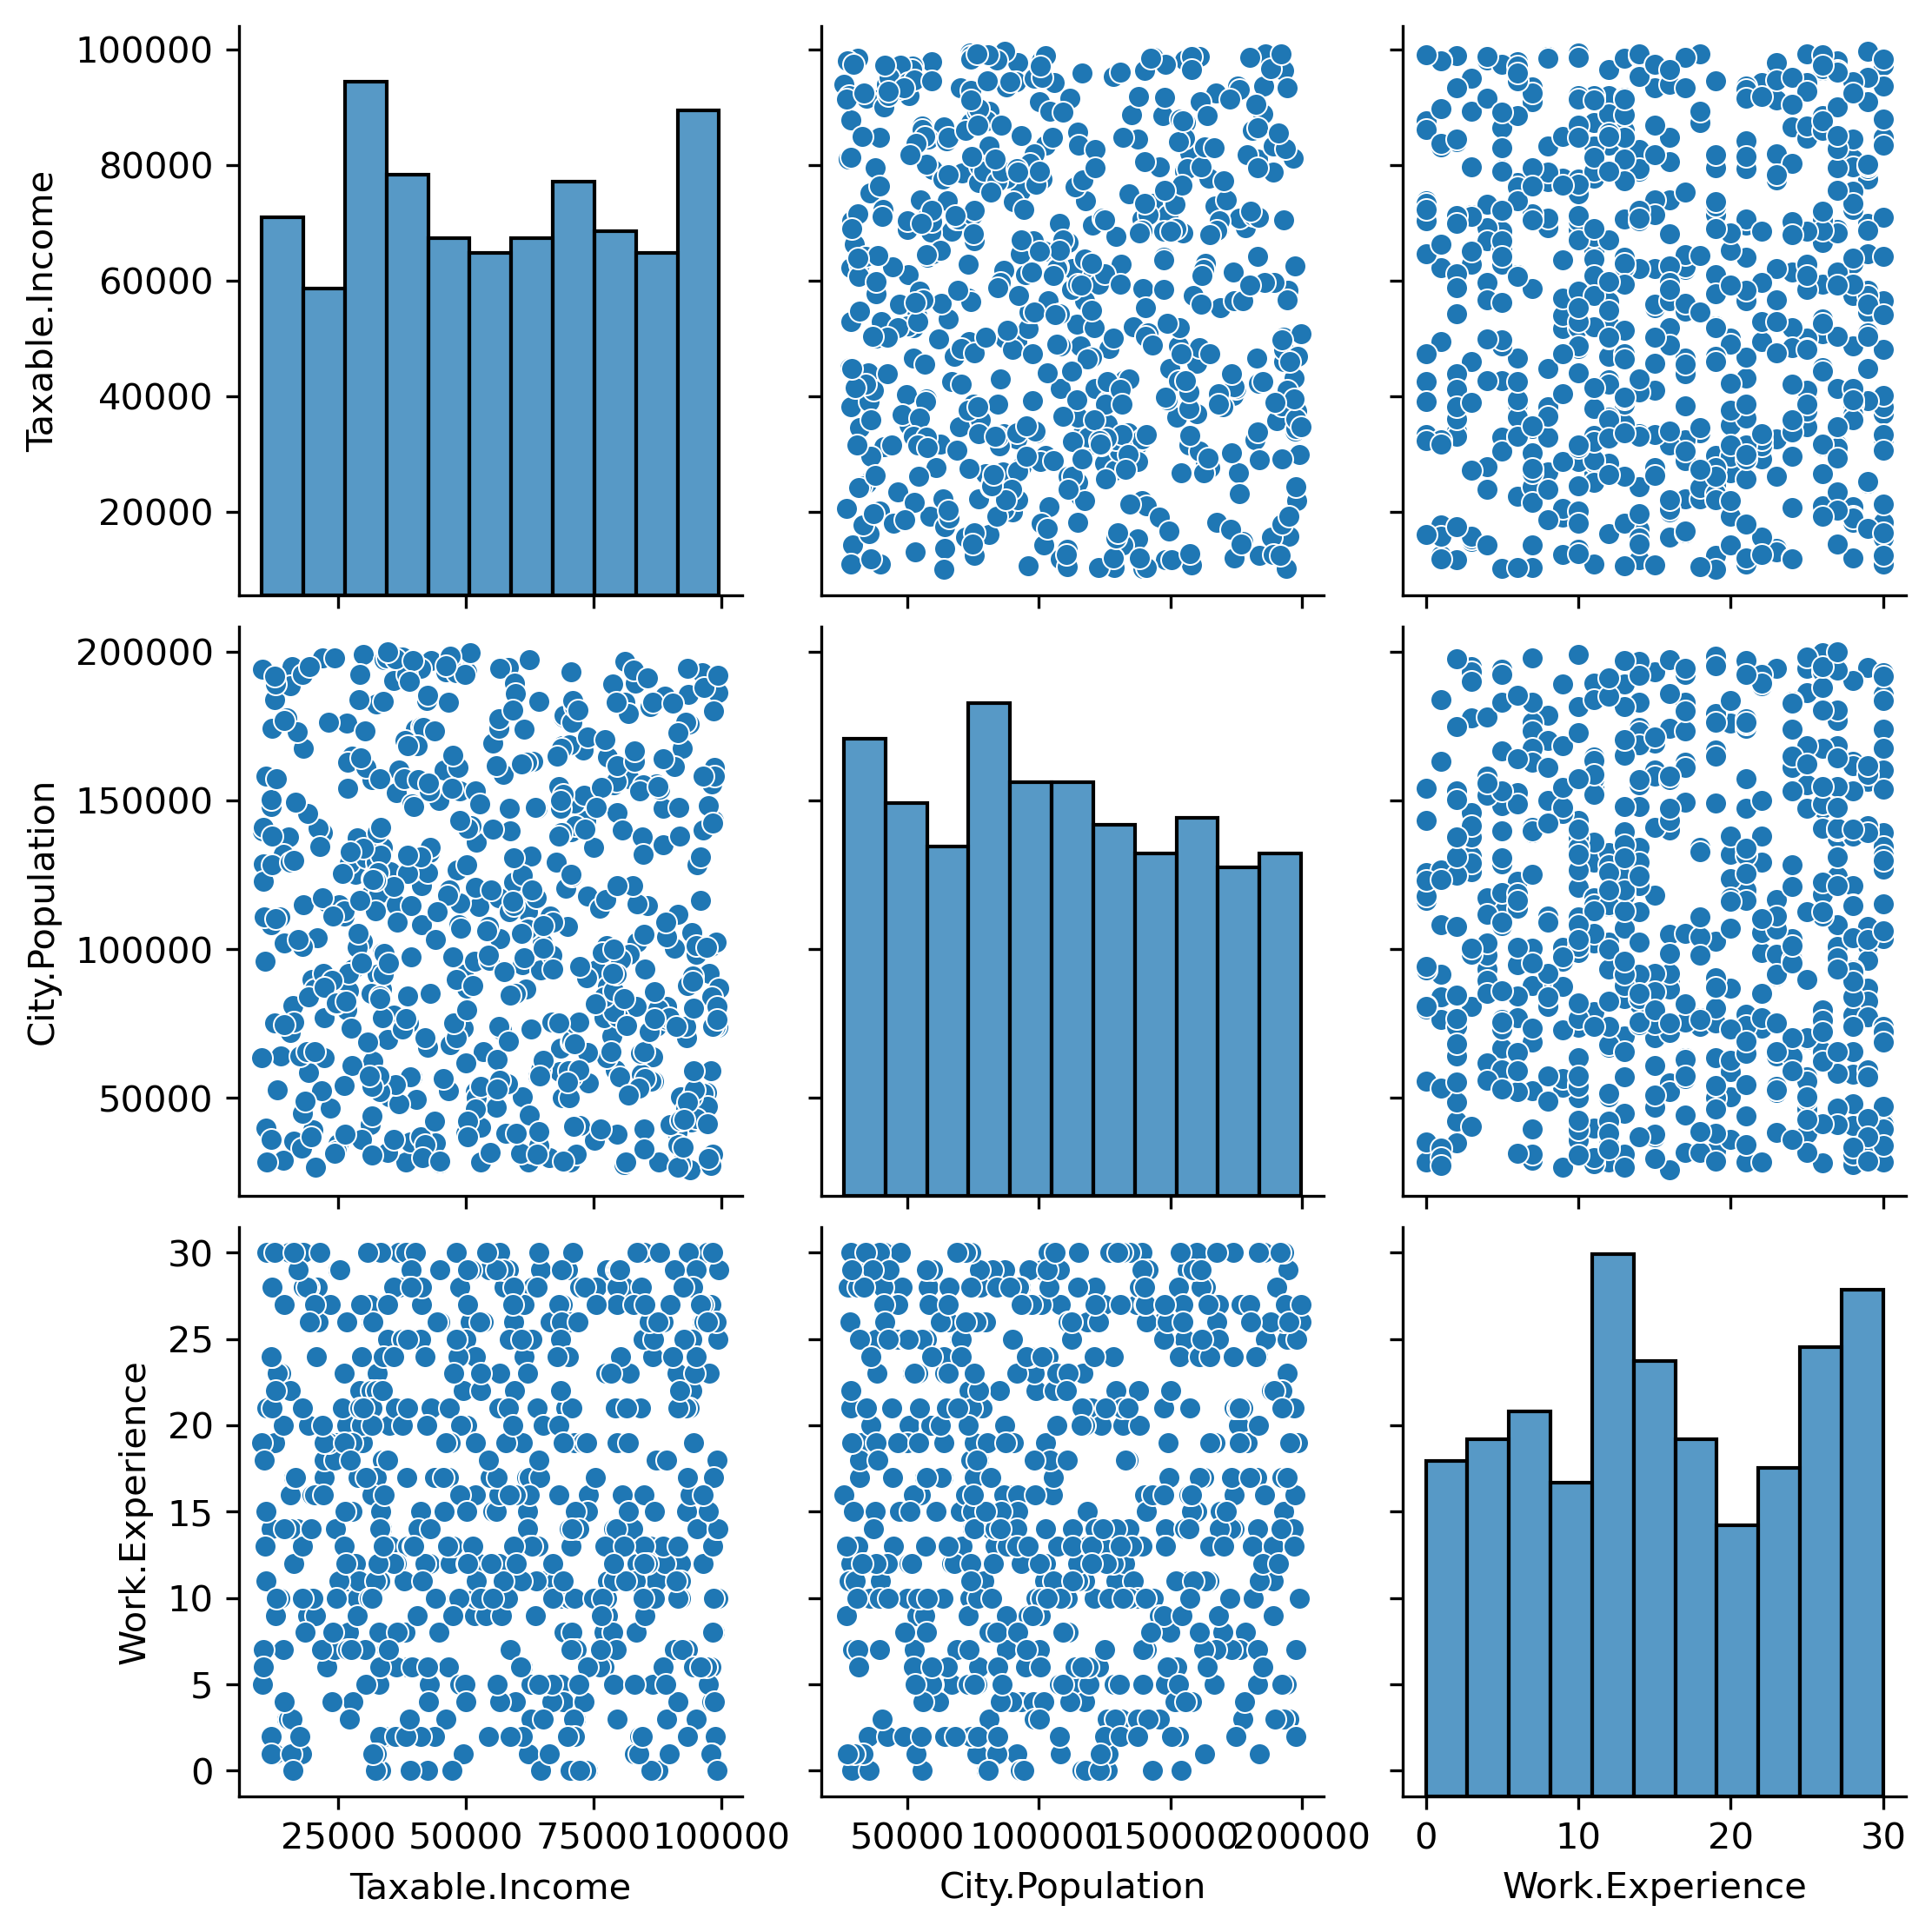

In [7]:
sns.pairplot(df)

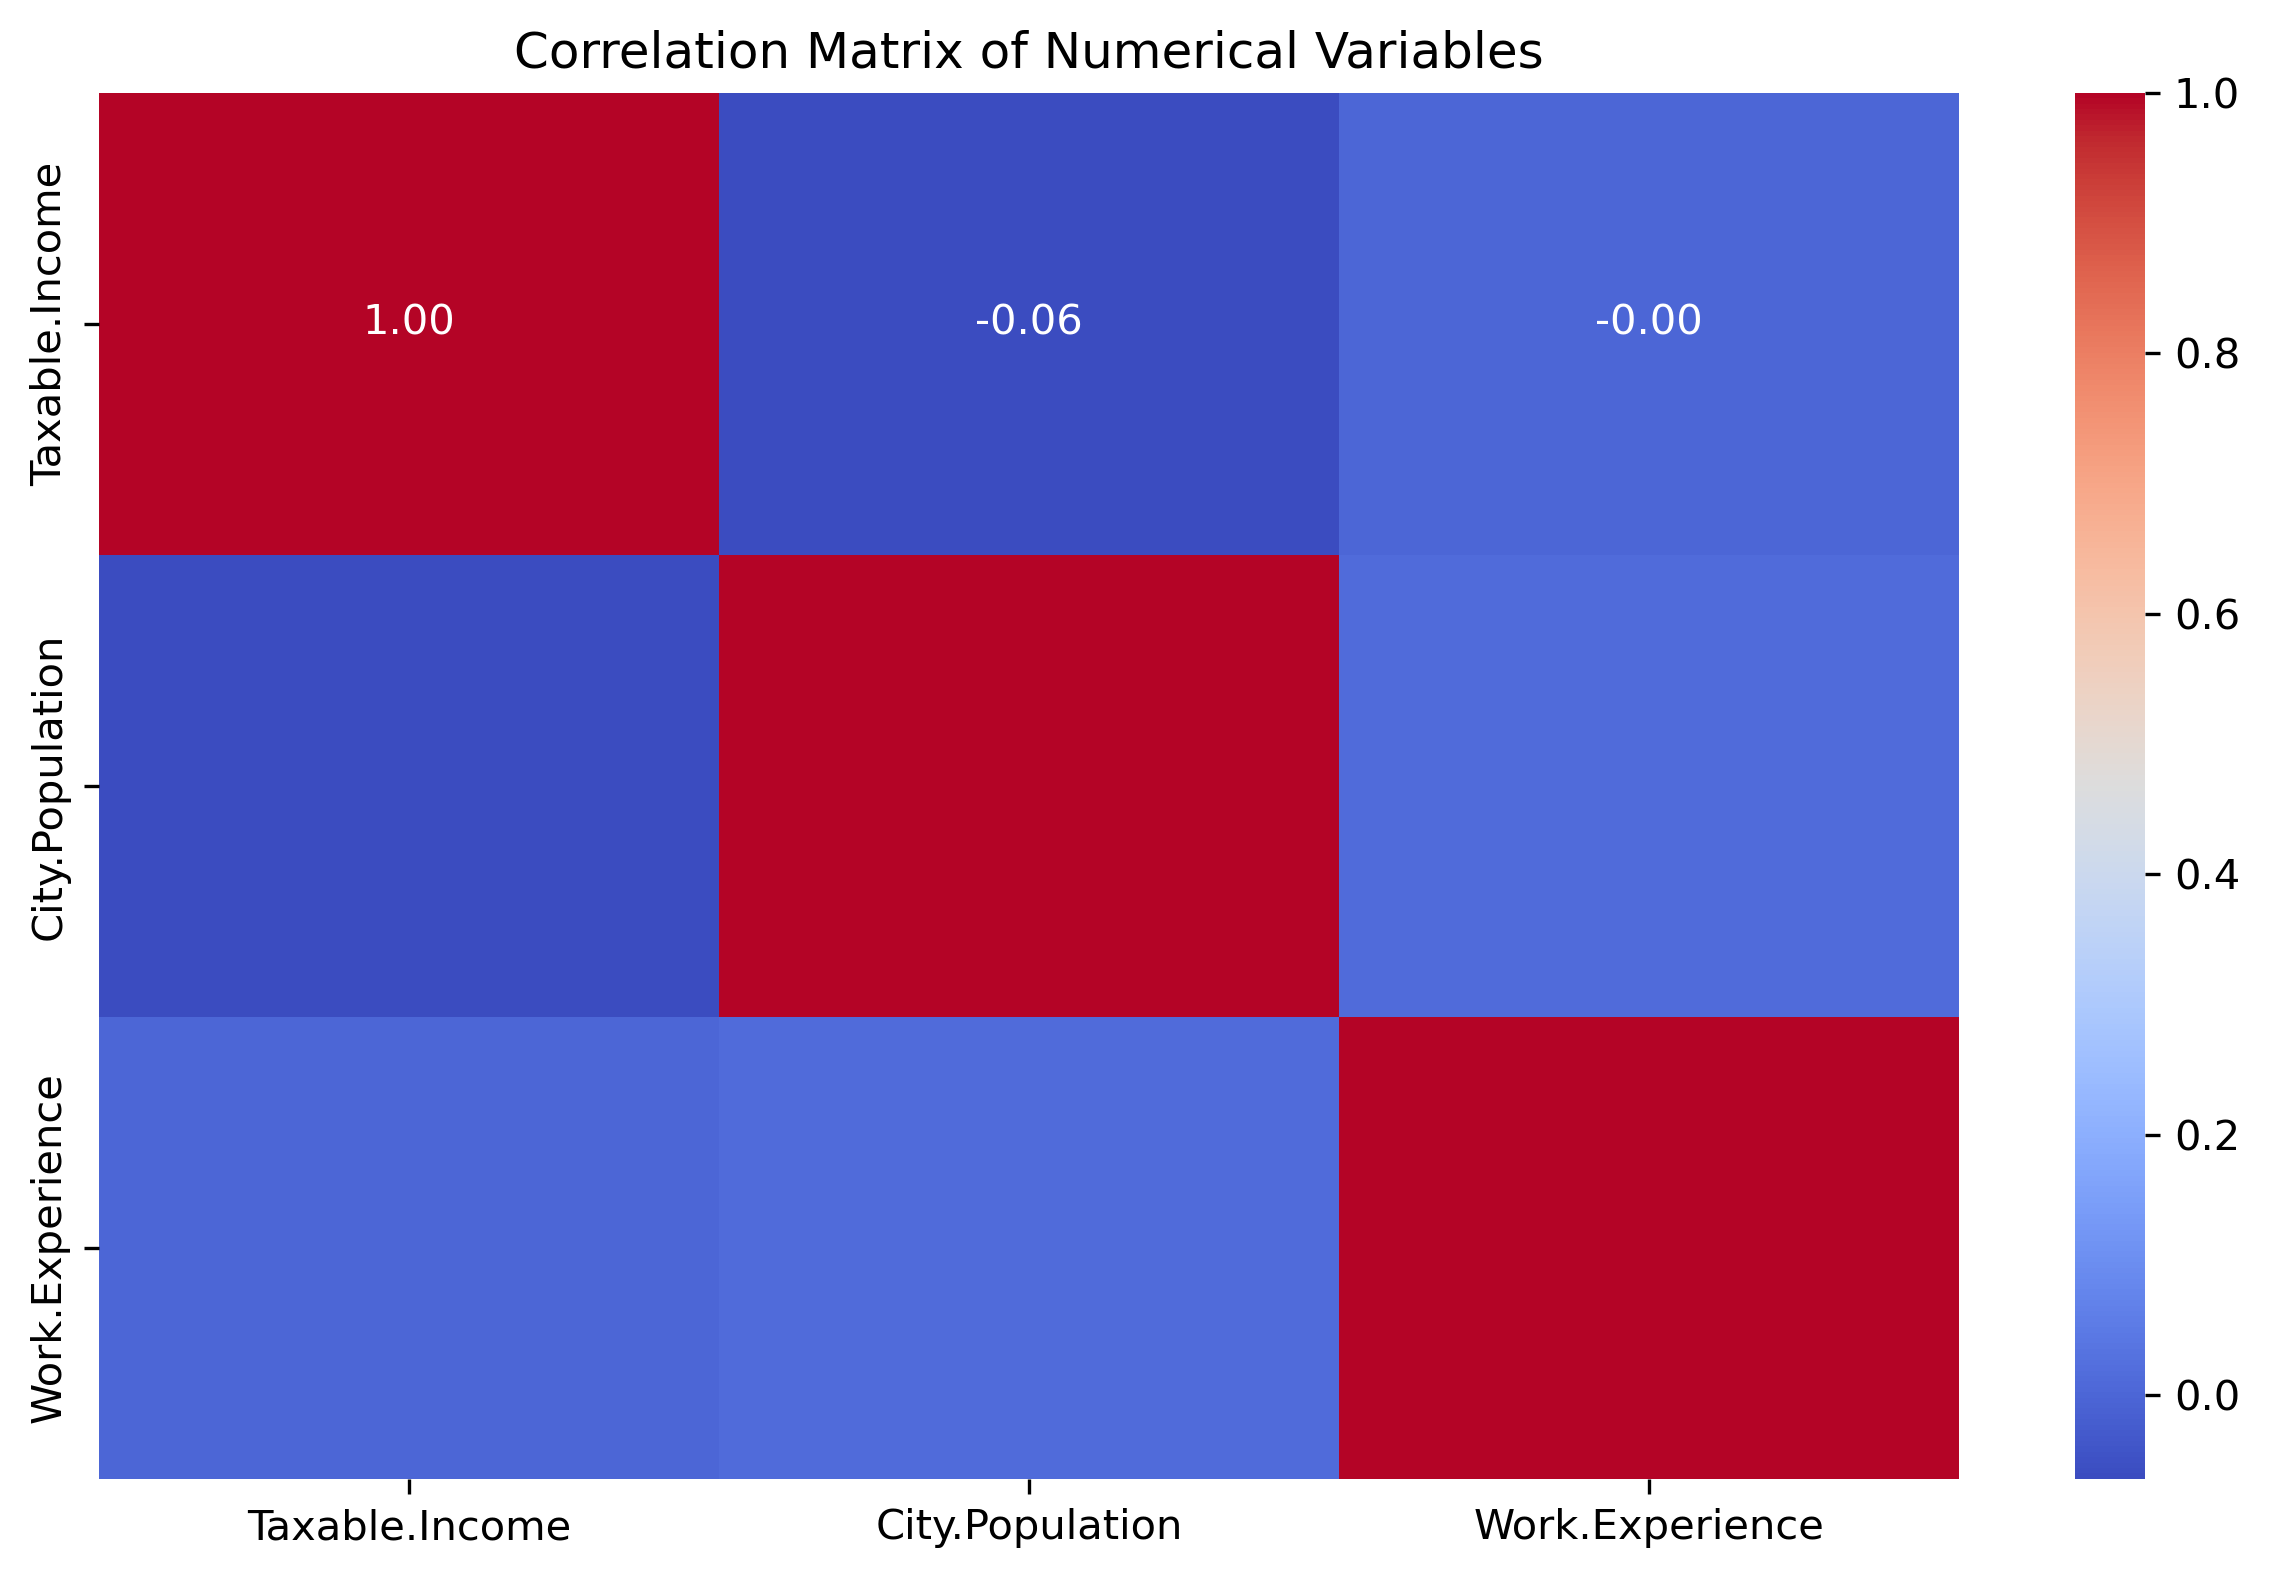

In [9]:
numerical_features = df.select_dtypes(int).columns
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

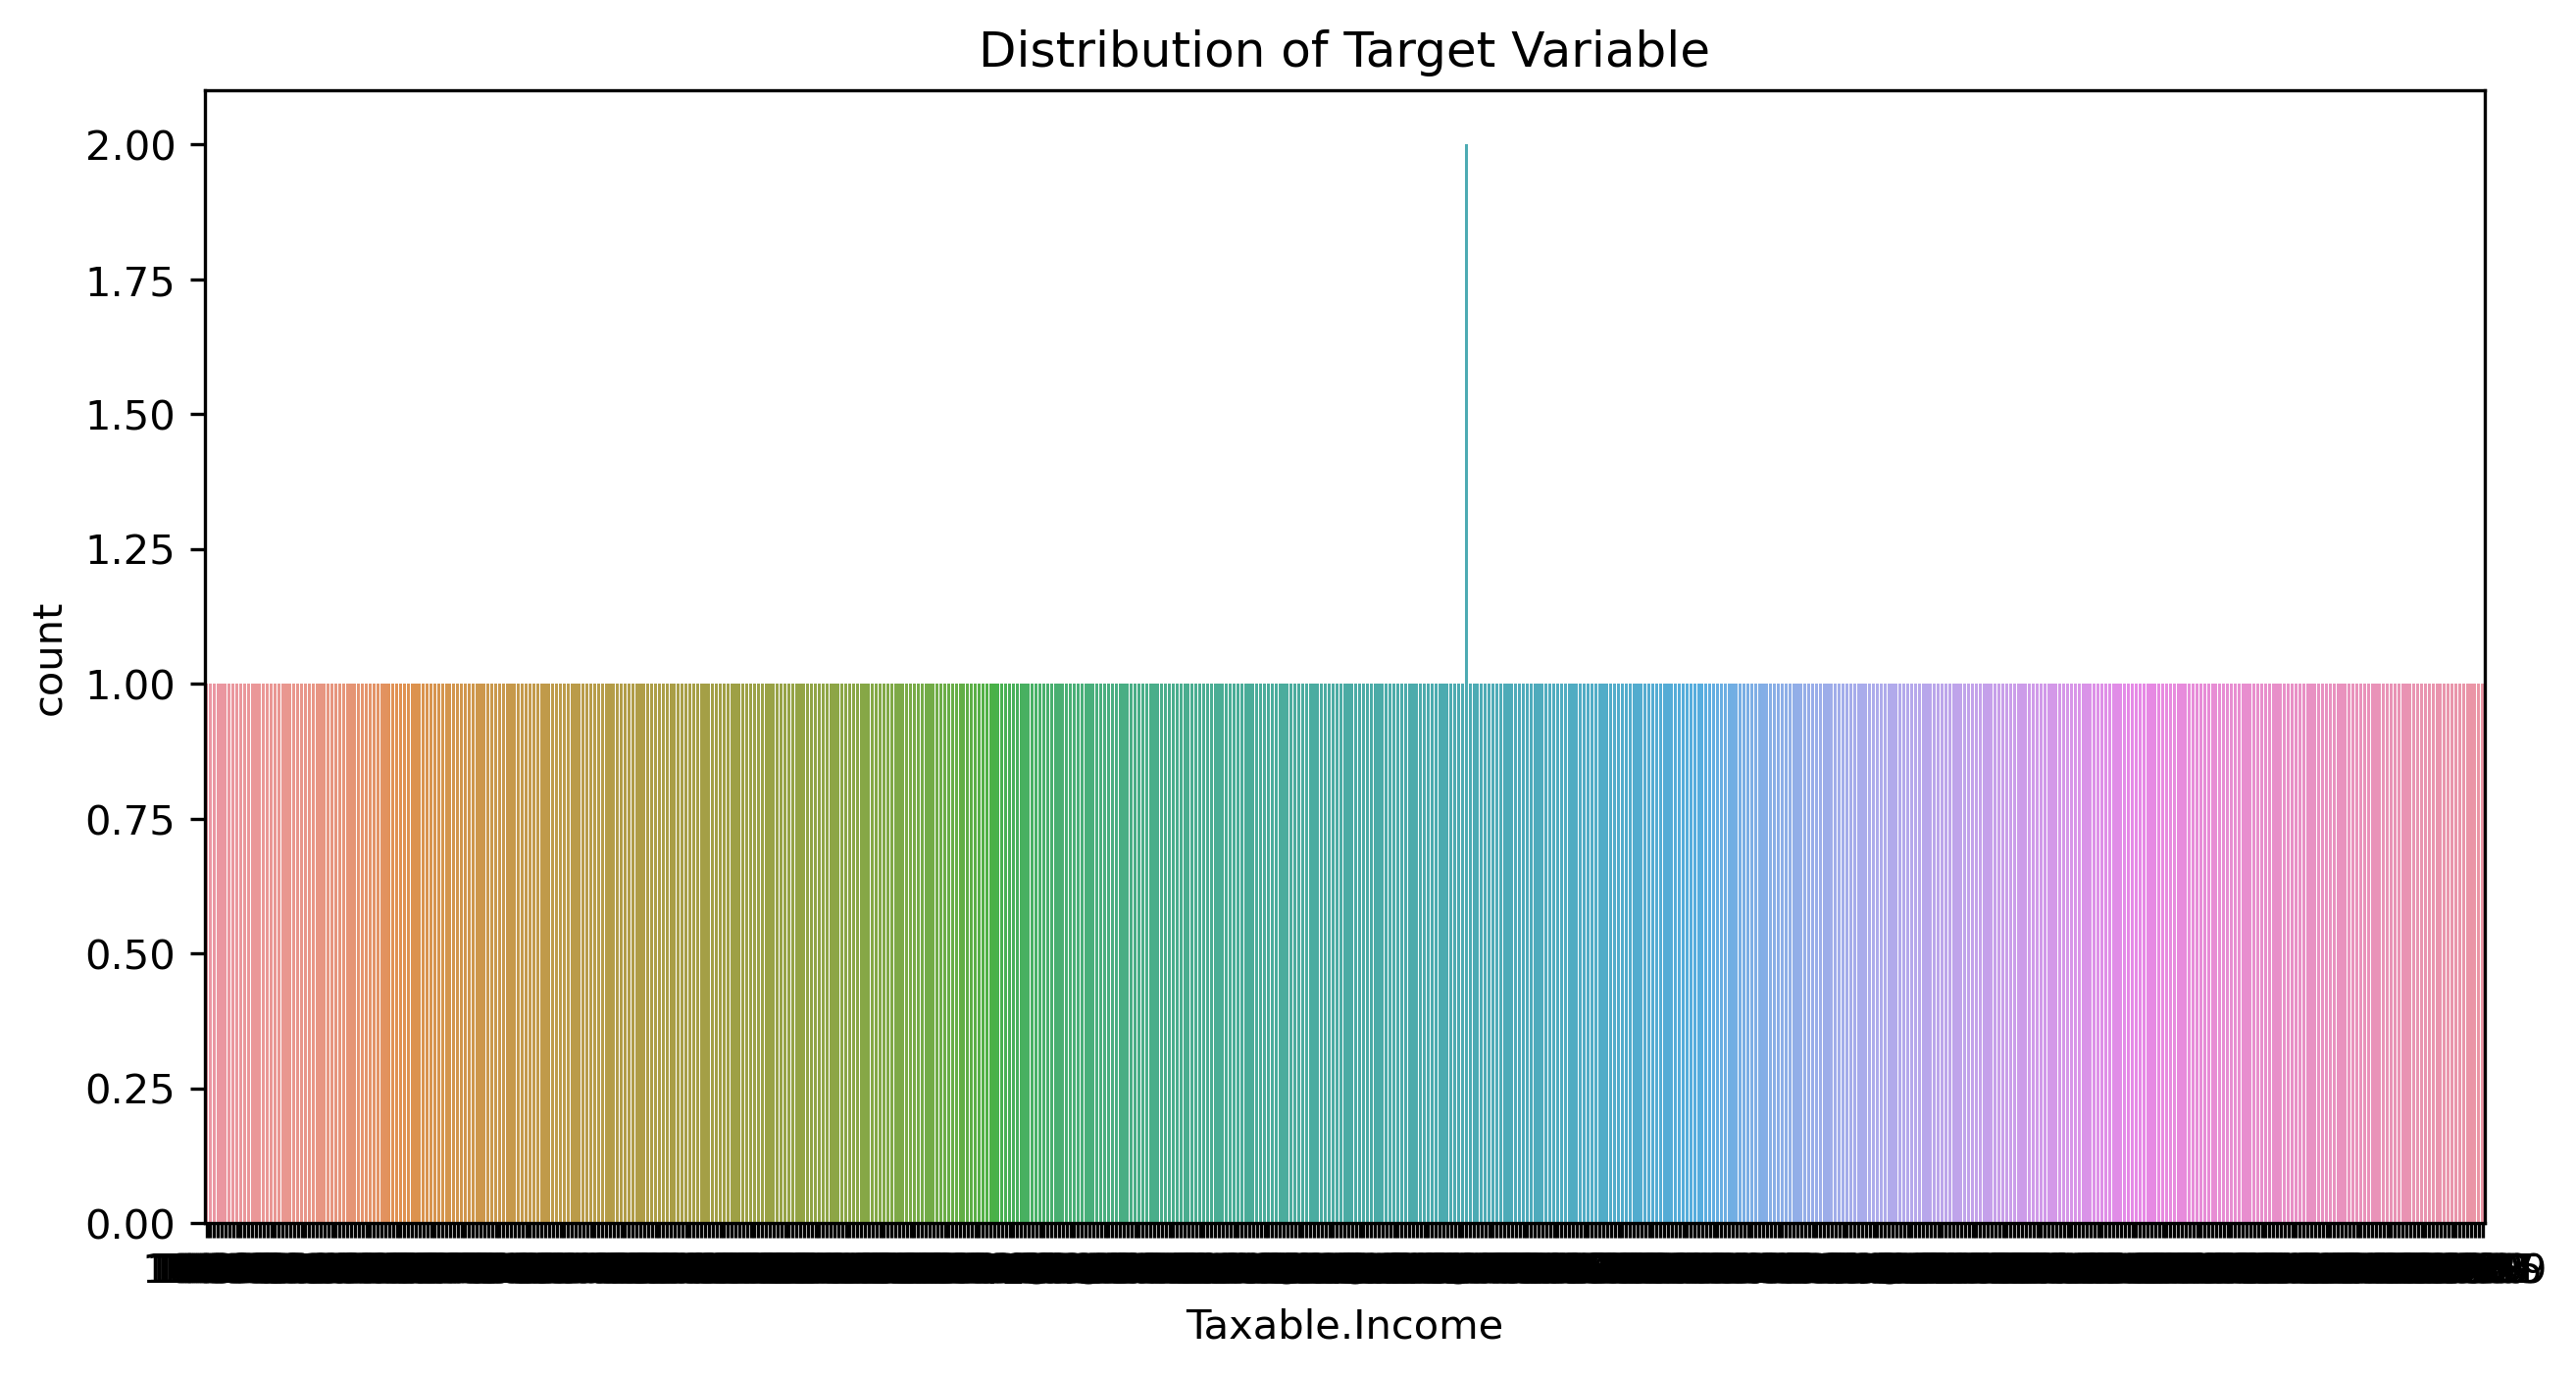

In [10]:
sns.countplot(x='Taxable.Income', data=df)
plt.title('Distribution of Target Variable')
plt.show()


In [11]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

In [12]:
cat_cols = df.select_dtypes(object).columns
cat_cols 

Index(['Undergrad', 'Marital.Status', 'Urban'], dtype='object')

In [13]:
df[cat_cols] = oe.fit_transform(df[cat_cols])

In [14]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0.0,2.0,68833,50047,10,1.0
1,1.0,0.0,33700,134075,18,1.0
2,0.0,1.0,36925,160205,30,1.0
3,1.0,2.0,50190,193264,15,1.0
4,0.0,1.0,81002,27533,28,0.0
...,...,...,...,...,...,...
595,1.0,0.0,76340,39492,7,1.0
596,1.0,0.0,69967,55369,2,1.0
597,0.0,0.0,47334,154058,0,1.0
598,1.0,1.0,98592,180083,17,0.0


In [15]:
j = 0
for i in df['Taxable.Income']:
    if i <= 30000:
        df['Taxable.Income'][j] = 'Risky'
    else:
        df['Taxable.Income'][j] = 'Good'
    j = j + 1    

In [16]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0.0,2.0,Good,50047,10,1.0
1,1.0,0.0,Good,134075,18,1.0
2,0.0,1.0,Good,160205,30,1.0
3,1.0,2.0,Good,193264,15,1.0
4,0.0,1.0,Good,27533,28,0.0
...,...,...,...,...,...,...
595,1.0,0.0,Good,39492,7,1.0
596,1.0,0.0,Good,55369,2,1.0
597,0.0,0.0,Good,154058,0,1.0
598,1.0,1.0,Good,180083,17,0.0


In [17]:
X = df.drop(columns='Taxable.Income')
y = df['Taxable.Income']

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [19]:
X = sc.fit_transform(X)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Model Building

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rfc = RandomForestClassifier()

In [23]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
yp = rfc.predict(X_test)

In [25]:
yp

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
   

In [26]:
rfc.score(X_train, y_train), rfc.score(X_test, y_test)

(1.0, 0.7583333333333333)

In [27]:
from sklearn.model_selection import RandomizedSearchCV

In [28]:
from scipy.stats import randint

In [29]:
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': randint(5, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False]
}

In [ ]:
random_search = RandomizedSearchCV(
    rfc, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42
)

random_search.fit(X_train, y_train)

In [ ]:
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_

In [ ]:
rfc =RandomForestClassifier(max_depth=46, max_features='log2', min_samples_leaf=3,
                       min_samples_split=13, n_estimators=666)
rfc.fit(X_train, y_train)
yp = rfc.predict(X_test)

In [ ]:
rfc.score(X_train, y_train), rfc.score(X_test, y_test)